In [1]:
import numpy as np
import sys  
sys_path="d:\\software\\python3\\lib\\site-packages"
sys.path.append(sys_path)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.api import VAR

In [2]:

mdata = sm.datasets.macrodata.load_pandas().data
print(type(mdata))
mdata.head()

<class 'pandas.core.frame.DataFrame'>


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [3]:
# prepare the dates index
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
 #%%


In [4]:
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pd.DatetimeIndex(quarterly)

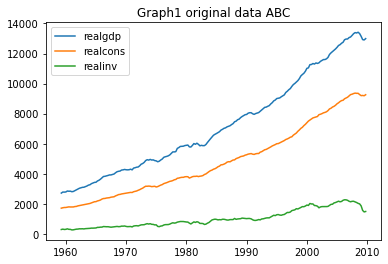

In [5]:
plt.title('Graph1 original data ABC')
plt.plot(mdata['realgdp'],label='realgdp')
plt.plot(mdata['realcons'],label='realcons')
plt.plot(mdata['realinv'],label='realinv')
plt.legend()
plt.show()

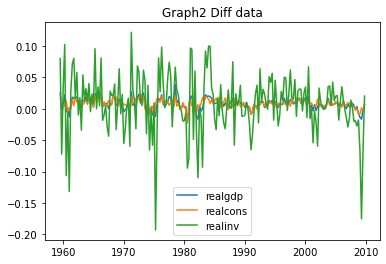

In [6]:
data = np.log(mdata).diff().dropna()
#data = mdata.diff().dropna()

#%%
plt.title('Graph2 Diff data')
plt.plot(data['realgdp'],label='realgdp')
plt.plot(data['realcons'],label='realcons')
plt.plot(data['realinv'],label='realinv')
plt.legend()
plt.show()

In [7]:
model = VAR(data)
results = model.fit(1)



D:\Software\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


In [8]:
order_results = model.fit(maxlags=15, ic='aic')
print(order_results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 24, Jun, 2024
Time:                     16:12:13
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.4257
Nobs:                     199.000    HQIC:                  -27.7212
Log likelihood:           1961.15    FPE:                7.47593e-13
AIC:                     -27.9222    Det(Omega_mle):     6.45336e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001281         0.001295            0.989           0.322
L1.realgdp         -0.286148         0.171582           -1.668           0.095
L1.realcons         0.673869         0.132245            5.096    

In [9]:
lag_order = order_results.k_ar
print(results.forecast(data.values[-lag_order:], 5))
#第一个参数是初始的值，第二个参数是未来要预测多少期，
# model是滞后k期的，就是倒数k个数值作为初始值

[[0.00785158 0.00860589 0.00834729]
 [0.00783132 0.00840891 0.00873314]
 [0.00771352 0.00836347 0.00799093]
 [0.00767643 0.00833281 0.00782077]
 [0.00765623 0.0083205  0.00771132]]


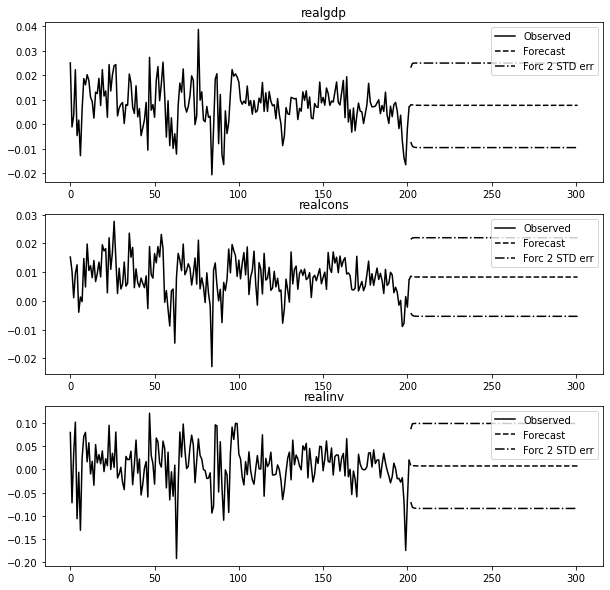

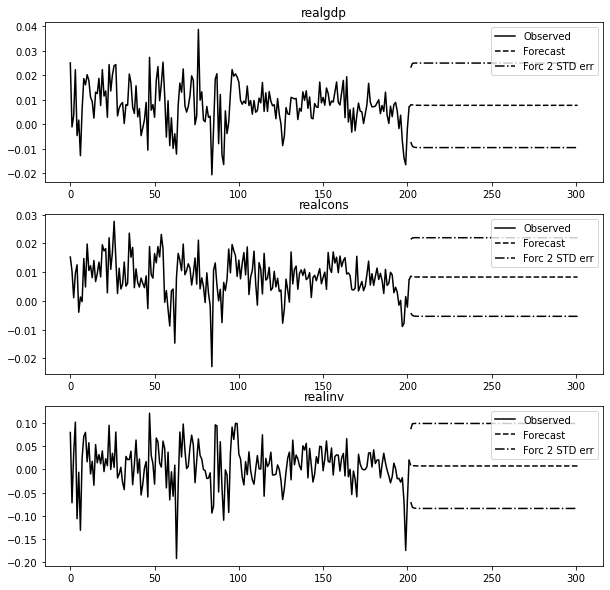

In [10]:
results.plot_forecast(100)
#直接把预测的结果以图像形式画出

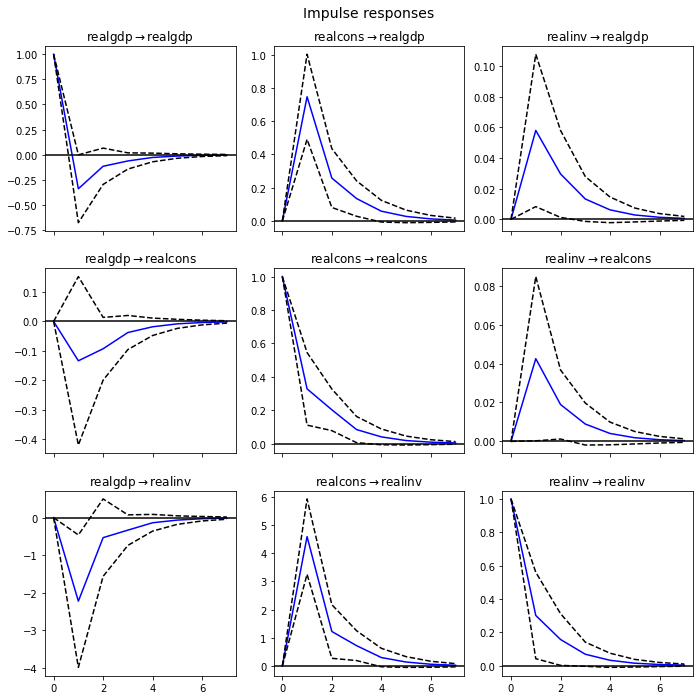

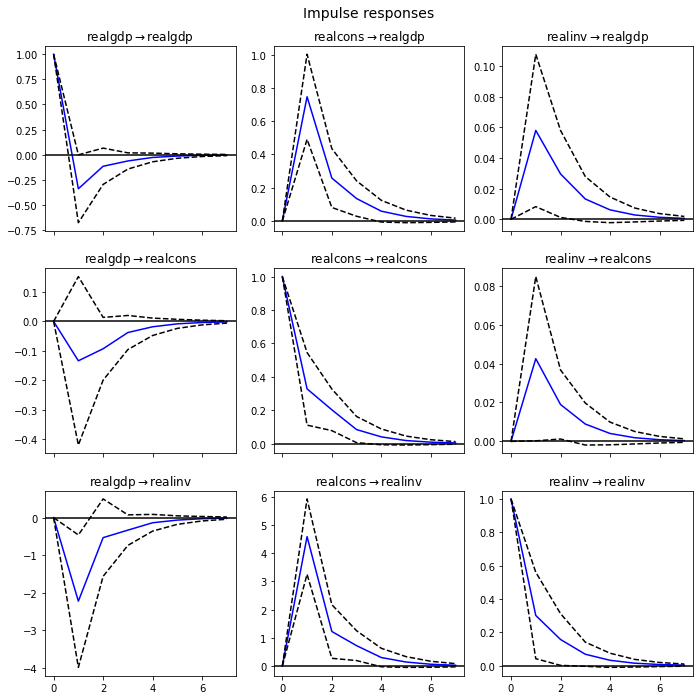

In [11]:
irf = results.irf(7)
irf.plot()
#参数5，即分析一个单位标准差的冲击对未来5期的影响


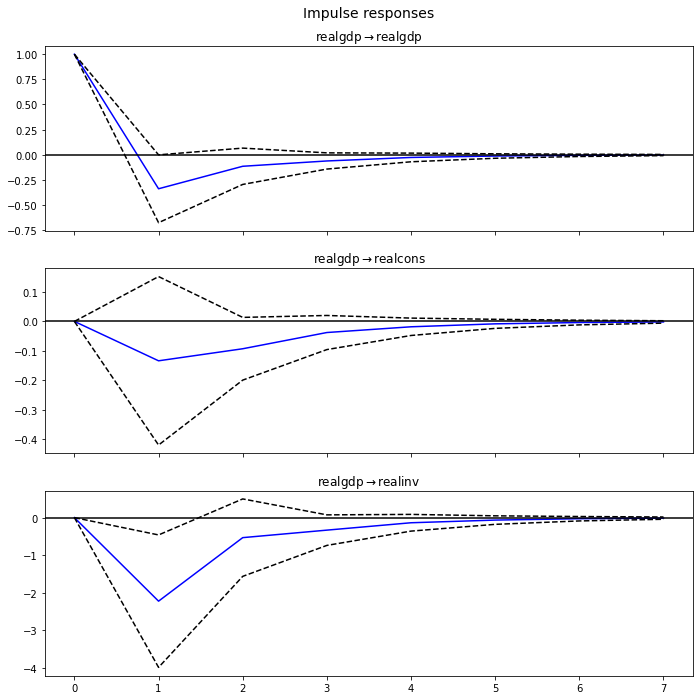

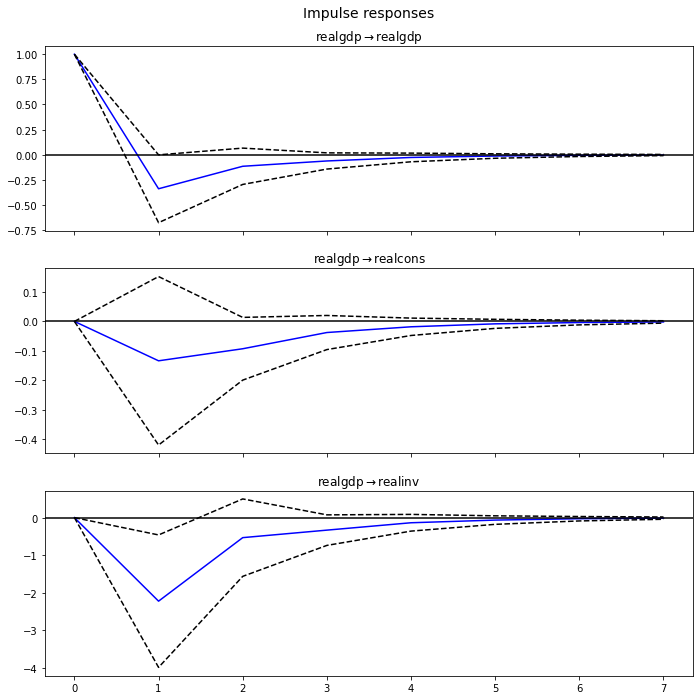

In [12]:
irf.plot(impulse='realgdp')
#也可以只plot其中一个变量冲击的结果


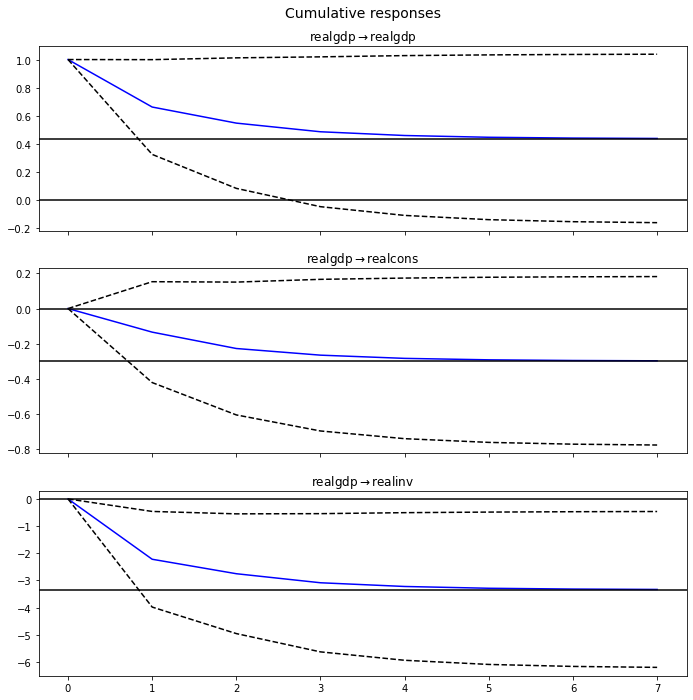

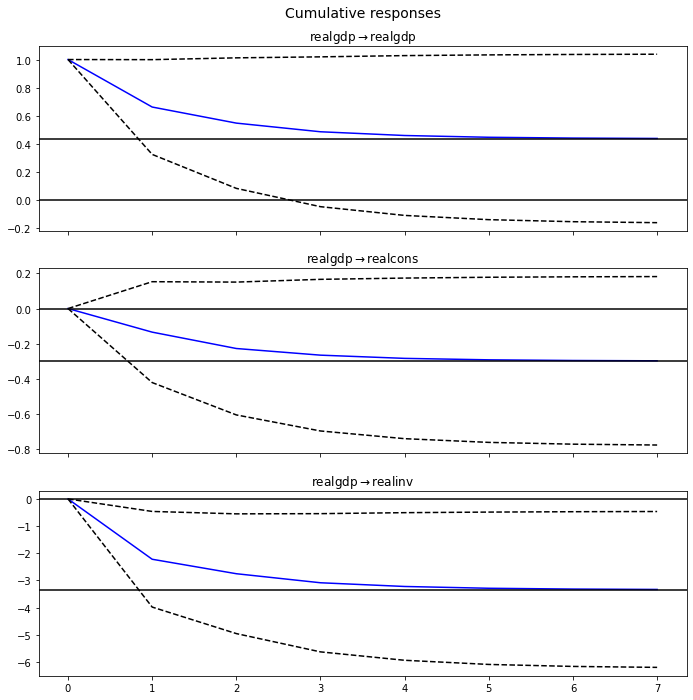

In [13]:
irf.plot_cum_effects(impulse='realgdp')
#累计效应结果

In [47]:
#第一个参数是果，第二个参数是因
test1 = model.fit(1).test_causality('realgdp', causing=['realcons'], kind='wald', signif=0.05)
print(test1,test1.pvalue)
#%%
test2 = model.fit(1).test_causality('realcons', causing=['realgdp'], kind='wald', signif=0.05)
print(test2,test2.pvalue)

#%%
test3 =results.test_causality('realgdp', ['realinv', 'realcons'], kind='wald', signif=0.05)
print(test3,test3.pvalue)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: realcons does not Granger-cause realgdp: reject at 5% significance level. Test statistic: 32.748, critical value: 3.841>, p-value: 0.000> 1.0493503886551344e-08
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: realgdp does not Granger-cause realcons: fail to reject at 5% significance level. Test statistic: 0.840, critical value: 3.841>, p-value: 0.359> 0.35946723276093295
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: ['realinv', 'realcons'] do not Granger-cause realgdp: reject at 5% significance level. Test statistic: 34.840, critical value: 5.991>, p-value: 0.000> 2.720449322689909e-08


In [48]:
fevd = results.fevd(5)
print(fevd.summary())

FEVD for realgdp
      realgdp  realcons   realinv
0    1.000000  0.000000  0.000000
1    0.863290  0.117446  0.019264
2    0.852569  0.123851  0.023579
3    0.849514  0.126098  0.024387
4    0.848953  0.126485  0.024563

FEVD for realcons
      realgdp  realcons   realinv
0    0.369003  0.630997  0.000000
1    0.387804  0.595911  0.016285
2    0.387739  0.593203  0.019058
3    0.388036  0.592295  0.019669
4    0.388073  0.592133  0.019794

FEVD for realinv
      realgdp  realcons   realinv
0    0.576515  0.160707  0.262779
1    0.489217  0.292549  0.218234
2    0.490804  0.291795  0.217401
3    0.490118  0.293047  0.216835
4    0.490068  0.293178  0.216754


None


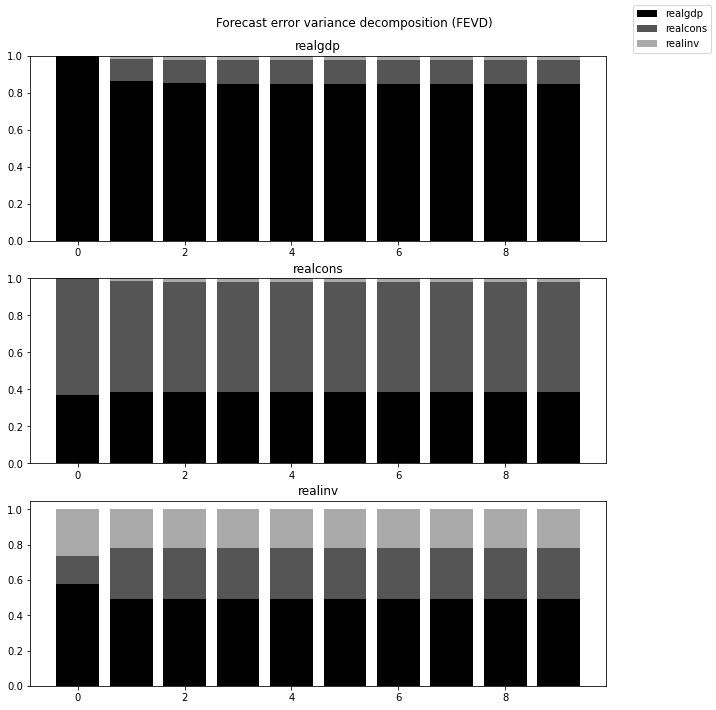

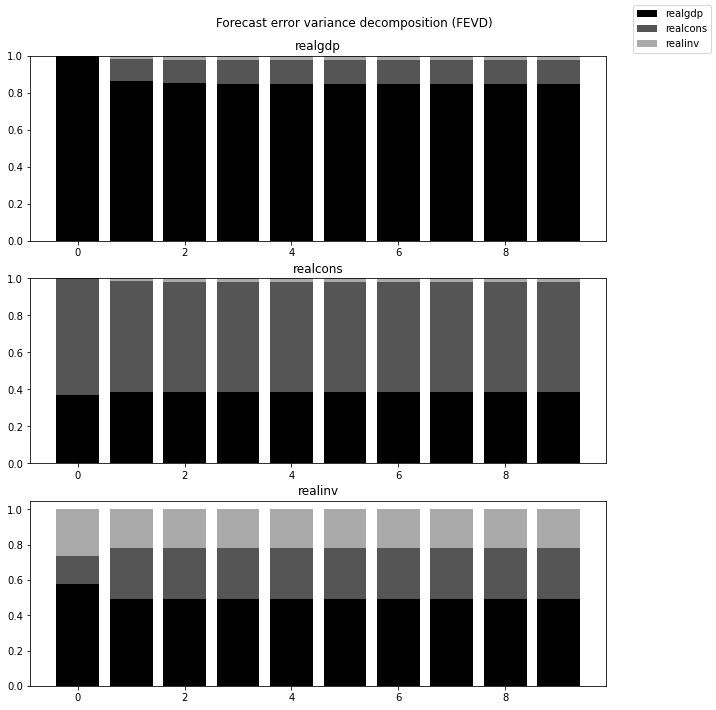

In [17]:
results.fevd(10).plot()
